In [1]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium

# Install xvfb
apt install -y xvfb

# Install Selenium-Profiles & google-colab-shell
pip uninstall -y selenium_profiles
pip install --no-cache-dir selenium_profiles>=2.2.5.5

# pip install https://github.com/kaliiiiiiiiii/Selenium-Profiles/archive/refs/heads/dev.zip # dev-branch

pip install google-colab-shell # free shell

Executing: /tmp/apt-key-gpghome.QwgDWEMQCc/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.RckvhN4DW6/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.FpOCb0yT3S/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.ubuntu.com/ubuntu

In [2]:
#@title Free shell
from google_colab_shell import getshell
getshell()

In [9]:
#@title Start actual driver
from selenium_profiles.driver import driver as mydriver
from selenium_profiles.profiles import profiles
from selenium.webdriver.common.by import By  # locate elements
from selenium_profiles.utils.colab_utils import display, showscreen, show_html # virtual display

from webdriver_manager.chrome import ChromeDriverManager

chromedriver_path = executable_path=ChromeDriverManager(version="90.0.4430.24").install()

mydriver = mydriver()
display = display()

display.start_display()

profile = profiles.Windows() # or .Android
profile["cdp"]["cores"] = None # Chrome 90 doesn't allow emulating cores :(driver = mydriver.start(profile, uc_driver=False, executable_path=chromedriver_path)

/usr/local/lib/python3.9/dist-packages/selenium_profiles/scripts/profiles.py:109: UserWarning: Might be more likely to get detected with sandbox set to False!
  warnings.warn('Might be more likely to get detected with sandbox set to False!')


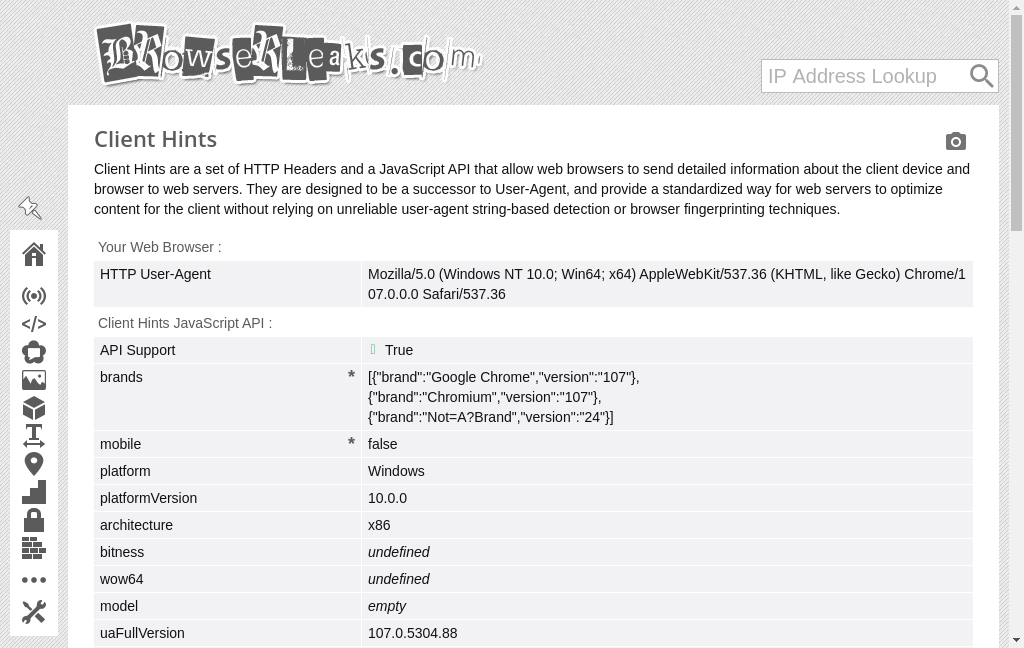

In [10]:
#@title Get URL
driver.get('https://browserleaks.com/client-hints')  # test client hints
showscreen(driver)
# show_html(driver)

In [8]:
#@title Quit driver
driver.quit()
display.stop_display()